# Part 1: Classifying Fashion-MNIST

* 이번 실습에서는 지난 시간과 거의 유사한 작업을 Fashion-MNIST dataset에 대해서 수행하겠습니다

* Fashion-MNIST 는 28x28 흑백으로 된 의류 image입니다
* 숫자를 표현한 MNIST 보다는 더 복잡한 image가 되어, NN의 성능을 시험해보기 조금 더 난해한 dataset 입니다 (물론 지금 시대에는 여전히 쉬운 작업입니다)

* dataset에 대한 그림은 아래와 같습니다

<img src='assets/fashion-mnist-sprite.png' width=500px>

* 작업은 여러분이 처음부터 끝까지 코딩을 하시면 됩니다
* 전체적인 흐름은 지난 주 숙제와 동일하기 때문에 (결국 10개의 의상 종류로 분류합니다) 지난 주 숙제 solution이나 본인이 짠 부분을 대부분 가져와서 해보시면 됩니다.

* 아래는 dataset을 준비하는 과정입니다

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

* 아래 명령으로 이미지 중에 한개를 살펴봐서 준비가 되었는지 확인해 봅시다

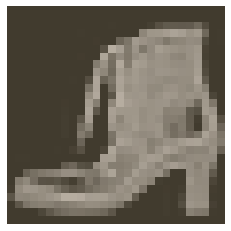

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

### Exercise 1

* 이미지가 28x28인 점을 고려하여 지난주에 벡터로 변환하는 작업을 수행하고
* fc1,...,fc4 까지 linear layer를 만드시고
* 최종 output layer fc4는 10개 분류 작업을 할 수 있도록 구성
  * [주의] 여기서 최종적으로 아래 코드를 통해서 분류 결과를 표출을 통일하기 위해서 네트워크 최종단에 즉 fc4 layer에 F.log_softmax 처리를 하여 출력
  * 나머지 layer는 F.relu가 잘 동작합니다 (다른 activation사용해도 무방함)
* 각 hidden layer의 노드 수는 (width)는 각자 정하시면 됩니다 

* Cost function도 정하시고, 출력이 log_softmax 임을 고려하여 작성
* autograd, optimizer를 사용하여 training 수행 
* fc1 는 256의 크기로 구성
* fc2 는 128의 크기로 구성
* fc3 는 64의 크기로 구성
* epoch수는 5

In [3]:
from torch import nn, optim
import torch.nn.functional as F
#네트워크에 값을 넣어서 model을 만든다. 네트워크의 init에는 파라미터(h와 W )가 자동으로 만들어지며 
#forward를 통해 relu와 softmax적용된 x가 나온다.
class Classifi:
    # TODO: 네트워크를 완성하세요 (forward 함수 정의하는것 잊지 마시고요)
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)#여기서 28x28 을 784의 벡터 형태로 바꿔줌
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x
    ###############

In [4]:
# TODO: 네트워크를 training 하세요 (epoch는 5번으로 하죠)

model = Classifier()
criterion = nn.NLLLoss()#cross antropy 말고 Nlloss()쓴다. => cross 는 softmax안취해 주기 때문에
optimizer = optim.Adam(model.parameters(), lr=0.003)#무엇을 최적화 할 것인지 써주는것

epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        #### 답 작성
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()#epochs 돌때마다 한번 초기화 한다.
        loss.backward()#미분값 구하고
        optimizer.step()#업데이트 한다.
        
        #### 
        
        running_loss += loss.item()
    else:
        # 다 더해준 값을 trainloder 만큼 나눠준다 -> 평균을 구하는 것임.
        print(f"Training loss: {running_loss/len(trainloader)}")

AttributeError: 'Classifier' object has no attribute 'parameters'

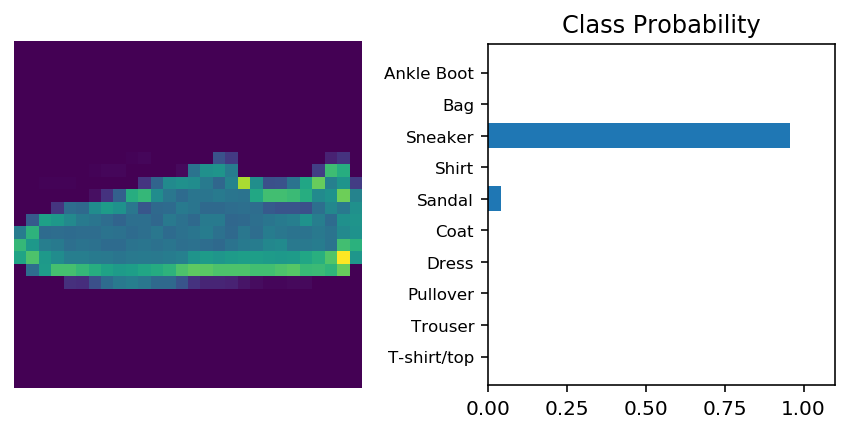

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# log softmax 값을 softmax로 변환하여 확률값을 저장
ps = torch.exp(model(img))#log 값으로 되어 있기 때문에 exp로 풀어서 봄.

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')

# Part 2: Inference and Validation

* 지금까지는 network를 training하는 방법에 대해서 알아보았습니다
* Training 된 network를 활용하여 예측 (prediction)을 하는 것을 ML 용어로 inference라고 합니다
* Training된 network를 새로운 데이터에 대해서도 좋은 성능을 갖게하는 것을 generalization 이라고 합니다 
* 하지만, neural network (또는 모든 ML)은  training 된 데이터에 너무 최적화되어, 새로운 데이터에대해서 성능이 떨어지는 (generalization 이 안되는) 문제가 발생합니다. 이런 현상을  **overfitting** 이라고 합니다
* **Generalization** 이 잘되어서 **overfitting** 안일어났는지 확인하는 작업을 **validation** set으로 data를 분리하여 수행합니다
* Overfitting이 일어나지 않도록 처리하는 여러 기법을 **regulariztion** 이라고 하며, 대표적으로 **dropout**과 같은것이 있습니다
* 이번 실습에서는 **validation**에 대해서 알아보겠습니다

* dataset 은 torchvision을 통해서 load하겠습니다
* Torchvision에 대한 자세한 기능은 차차 배우기로 학고, 우선은 테스트 세트를 load하기 위해서 `train=False` 로 설정합니다

```python
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
```

* test set은 trainging set과 비슷한 구조를 갖습니다
* 보통 전체 data의 10-20%를 테스트를 위해서 남겨둡니다

* 본 작업에 목적은 training set에 포함하지 않은 data에 대해서 성능을 측정하는 것입니다
* 여기서 성능은 개발자에 의해서 용도에 맞게 설정합니다 
* 본 과제에서는 정확도 관점에서 성능을 측정학겠습니다
  - 즉 분류를 성공과 실패로 보고 성공의 비율을 측정합니다
* 기타 성능 측정을 위한 방법은 [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall#Definition_(classification_context)) 과 top-5 error rate 등이 있습니다
* 시작으로, 한개에 batch에 대한 forward pass를 실행합니다

In [51]:
model = Classifier()
# generalization = 새로운 데이터에 대해서 좋은 성능을 갖게 하는 것
# overfitting = training 데이터에 너무 최적화 되어서 새로운 데이터에 대해 성능이 떨어지는 현상
# validation = generalization 이 잘되 overfiting 이 안일어 나는지 확인하는 작업
# regulariztion = overfitting 이 일어나지 않도록 처리하는 기법, dropout 이 있음.

images, labels = next(iter(testloader))
# Get the class probabilities
log_ps = model(images)
ps = torch.exp(log_ps)# log값 풀어줌
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


* 출력은 각 classification 항목에 대한 확률 분포로 출력됩니다
* `ps.topk` method로 $k$개의 활률 값이 가장 높은 value와 index를 tuple로 받습니다
* 가장 높은 가능성으로 분류를 하고자하니, `ps.topk(1)`를 사용합니다
* 예를 들어서 가장 높은 value가 5번째이면 index 4를 받습니다

In [1]:
top_p, top_class = ps.topk(1, dim=1)
##topk => 각각 높은 성능을 가진 value의 index를 리턴해준다. 
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])
top_class.shape

NameError: name 'ps' is not defined

* 지금까지 네트워크에서 출력한 확률분포에서 가장 높은 확률값의 index를 64개 찾았습니다
* 이제 `top_class`와 `labels`를 비교하여 몇개를 맞췄는지 확인을 해야합니다
* 차원이 맞는 tensor 간에 `==`를 해서 비교합니다 (테스트 해보세요!)
* 다음을 실행하면 원하는 답이 나오지 않습니다
* `top_class`와 `labels`의 shape를 비교 해보고 싶은 생각이 드셔야합니다
```python
equals = top_class == labels
```
* (참고) broadcasting으로 `==` 연산이 일어난것이며, 우리가 원하는 연산은 아닙니다 

In [10]:
equals = top_class == labels.view(top_class.shape)
#top_class와 labels를 비교하여 몇개를 맞췄는지 확인
top_class.shape

torch.Size([64, 1])

* 이제 분류가 성공한 비율을 찾기위해서 전체를 더하고 총수로 나누는 (평균)을 내면됩니다
* `torch.mean`이 유용한데 
* `torch.mean(equals)`를 실행하면

```
RuntimeError: mean is not implemented for type torch.ByteTensor
```
* `equals`를 float tensor로 변환하여 적용합니다


In [11]:
accuracy = torch.mean(equals.type(torch.FloatTensor))#성공한 비율을 찾기위해 평균을 내줌
print(f'Accuracy: {accuracy*100}%')

Accuracy: 9.375%


* 당연히 네트워크가 training이 안되었기 때문에 값이 랜덤하게 나옵니다
* 저는 15% 정도 나오네요
* 이제 전체 test data (validation set)에 대한 loop를 완성하려 합니다 (위는 한 batch)
* 아래 Exercise를 수행하는데 중요한 코드가 있습니다
* `torch.no_grad():`는 tensor에 gradient 정보 없이 작업을 할때 사용합니다. 당연히 training이 없으니 network parameter를 업데이트할 필요가 없고, gradient 정보를 저장하는데 쓸데 없는 연산과 메모리 사용을 방지할 수 있습니다. Validation과정에서는 필수입니다! 

```python
# turn off gradients
with torch.no_grad():
    # validation pass here
    for images, labels in testloader:
        ...
```


**Exercise 2 [5 points]:** 
- 아래 validation loop를 완성하세요
  - 위에서 배운 것과 같이 testdata (testloader loop)에서 
    1. 해당 output (log_ps)를 확률값 ps 로 변환
    2. ps.topk 명령어를 사용하여 top_class 받고
    3. equals에 top_class와 label를 비교 (주의할 점은 top_class와 label의 size를 맞춰줘야합니다
    4. accuracy에 equals의 `평균값`을 `+=`를 사용하여 계속 더하세요 
      - equals는 한개의 batch의 `성공`, `실패`를 담고있죠 (64개의 성공과 실패)
      - 이것을 평균 (`torch.mean`) 내면 (해당 batch의 성공률이 나옵니다)
      - 최종적으로 batch별 성공률을 모두 더해서 총 batch의 갯수로 (`len(testloader)`) 나눠서 전체 데이터에 대한 성공률을 계산하기 위한 작업입니다 

In [12]:

model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        

        # 답작성: Training 코드 
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        #######################
        running_loss += loss.item()
        
         #traing 다 끝나고 else 돌린다. else는 validation 하는 부분
    else:
        test_loss = 0
        accuracy = 0
        

        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
        
                # 답작성 (Epoch 마다 천체 testdata에 대해서 accuracy를 구합니다)
                # 최종 값은 `accuracy` 라는 이름으로 받아야 아래 print문에 출력됩니다
                
                ps = torch.exp(log_ps)#log값 풀어주기 위해서 
                top_p, top_class = ps.topk(1, dim=1)#각각 row에 대해 제일 큰값의 인덱스를 리턴해준다.
                
                #eqals에다가 비교한값을 넣어준다. 이때 label의 형태를 top_class와 맞춰준다.
                #equals에는 각 batch의 성공과 실패를 담고있다. 
                #top_class와 label를 비교 = 전체 데이터에 대한 성공률을 계산
                equals = top_class == labels.view(top_class.shape)
                
                #equals의 타입을 float로 바꿔주고 torch.mean으로 평균을 내주면 해당 batch의 성공률이 나온다.
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
                #######################
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.519..  Test Loss: 0.457..  Test Accuracy: 0.833
Epoch: 2/30..  Training Loss: 0.387..  Test Loss: 0.416..  Test Accuracy: 0.853
Epoch: 3/30..  Training Loss: 0.353..  Test Loss: 0.397..  Test Accuracy: 0.854
Epoch: 4/30..  Training Loss: 0.332..  Test Loss: 0.410..  Test Accuracy: 0.854
Epoch: 5/30..  Training Loss: 0.314..  Test Loss: 0.369..  Test Accuracy: 0.870
Epoch: 6/30..  Training Loss: 0.304..  Test Loss: 0.385..  Test Accuracy: 0.866
Epoch: 7/30..  Training Loss: 0.294..  Test Loss: 0.377..  Test Accuracy: 0.872
Epoch: 8/30..  Training Loss: 0.285..  Test Loss: 0.370..  Test Accuracy: 0.870
Epoch: 9/30..  Training Loss: 0.274..  Test Loss: 0.393..  Test Accuracy: 0.872
Epoch: 10/30..  Training Loss: 0.269..  Test Loss: 0.355..  Test Accuracy: 0.876
Epoch: 11/30..  Training Loss: 0.261..  Test Loss: 0.377..  Test Accuracy: 0.870
Epoch: 12/30..  Training Loss: 0.250..  Test Loss: 0.368..  Test Accuracy: 0.875
Epoch: 13/30..  Training Loss: 0.243.

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

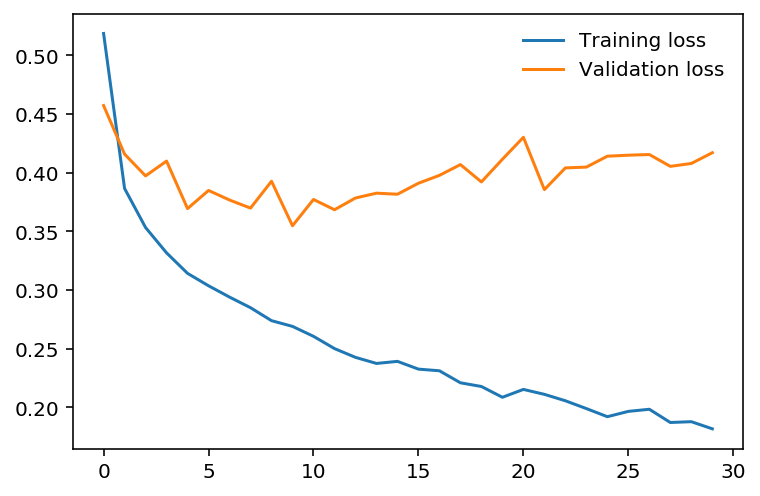

In [14]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

## Overfitting

* 위에서 수행한 결과를 살펴보면 overfitting 현상을 확인할 수 있습니다
* 같지는 않지만, 아래와 같은 현상:

<img src='assets/overfitting.png' width=450px>

- Training loss는 점점 줄어드는 반면, validation loss는 일정 줄어들다가 다시 늘어나는 현상을 확인 할 수 있습니다. 
- 궁극적인 목적은 새로운 data에 대해서 잘 동작하는 것이기 때문에 가장 낮은 validation loss를 갖도록 하는것이 목표 입니다
- 그래프에서 착안 할 수 있는 방법중 하나는 가장 낮아지는 epoch를 찾아서 멈추는 방법입니다. 이런 방법을 *early-stopping*이라고 합니다 
- 실제 적용하는 practice에서는 많은 training을 수행하며, 그 중에서 가장 좋은 성능(lowest validation error)의 network을 선택합니다
- Early stopping 이외에 매우 자주 사용되는 regularization 방법은 *dropout* 입니다
- Dropout은 네트워크의 연결을 랜덤하게 일정 비율로 끊어버리는 방법입니다
- Dropout이 왜 효과가 있는지는 이론 수업에서 다루도록 하겠습니다
- Pytorch에서 dropout을 수행하는 방법은 [`nn.Dropout`](https://pytorch.org/docs/stable/nn.html#torch.nn.Dropout) module 통해서 합니다

```python
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = None
        self.fc2 = None
        self.fc3 = None
        self.fc4 = None
        
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x
```

* 여기서 Dropout은 training 단계에서만 사용하고, validation에서는 전체 네트워크를 사용해야 합니다 (Why?)
* 즉, validation 과정에서는 dropout을 비활성화 해야하죠
  - 이를 위해서 `model.eval()`을 사용합니다
  - 즉, `model.eval()` 모드 하에서는 droupout 확률이 0으로 동작합니다   
  - 다시 dropout를 수행할때는 `model.train()`으로 활성화 합니다
  - 일반적으로 아래와 같이 동작하죠
    1. Validation loop에서 gradient를 끄고, model을 evaluation mode로 설정
    2. validation loss를 계산하고 
    3. 다시 train mode로 변경 
    
```python
# turn off gradients
with torch.no_grad():
    
    # set model to evaluation mode
    model.eval()
    
    # validation pass here
    for images, labels in testloader:
        ...

# set model back to train mode
model.train()
```

**Exercise 3 [5 points]:** 

- 아래 코드에서 dropout를 사용하기 위한 필요한 곳을 수정/채워 주세요
- model 에 dropout 적용, model.eval, model.train 등
- 아래 코드는 위에 적용했던 코드 Exercise 1 부분 제외한 모음입니다
- Template이라고 생각학고 적용하시면 됩니다

In [15]:
class Classifier(nn.Module):
    
    # 앞 문제에서 작성한 network에 dropout 적용
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        #Dropout = overfitting 일어났을때 사용, batch(hidden) 한번 돌 때 선을 0.2 확률로 끊고 update
        #Dropout은 네트워크의 연결을 랜덤하게 일정 비율로 끊어버리는 방법

        #traing 과 test 에서는 사용하면 안되므로 껏다 켜주는 걸 반복 해야함 
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x
    ##############################

In [16]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        
        # training 답 작성 
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        
        #######################
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Gradient를 계산할 필요 없으니 비활성화 
        with torch.no_grad():
            model.eval()#validation 과정에서는 dropout을 비활성화 ->droupout 확률이 0으로 동작
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                # 숙제 2번과 동일한 과정이니, 여기에 복사하여 붙이면 되겠죠?
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                ##################
        model.train()#켜는거
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.602..  Test Loss: 0.499..  Test Accuracy: 0.815
Epoch: 2/30..  Training Loss: 0.484..  Test Loss: 0.445..  Test Accuracy: 0.841
Epoch: 3/30..  Training Loss: 0.449..  Test Loss: 0.415..  Test Accuracy: 0.853
Epoch: 4/30..  Training Loss: 0.435..  Test Loss: 0.437..  Test Accuracy: 0.837
Epoch: 5/30..  Training Loss: 0.424..  Test Loss: 0.405..  Test Accuracy: 0.855
Epoch: 6/30..  Training Loss: 0.412..  Test Loss: 0.387..  Test Accuracy: 0.858
Epoch: 7/30..  Training Loss: 0.403..  Test Loss: 0.402..  Test Accuracy: 0.854
Epoch: 8/30..  Training Loss: 0.396..  Test Loss: 0.376..  Test Accuracy: 0.868
Epoch: 9/30..  Training Loss: 0.396..  Test Loss: 0.397..  Test Accuracy: 0.861
Epoch: 10/30..  Training Loss: 0.388..  Test Loss: 0.399..  Test Accuracy: 0.863
Epoch: 11/30..  Training Loss: 0.383..  Test Loss: 0.395..  Test Accuracy: 0.861
Epoch: 12/30..  Training Loss: 0.382..  Test Loss: 0.384..  Test Accuracy: 0.865
Epoch: 13/30..  Training Loss: 0.382.

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

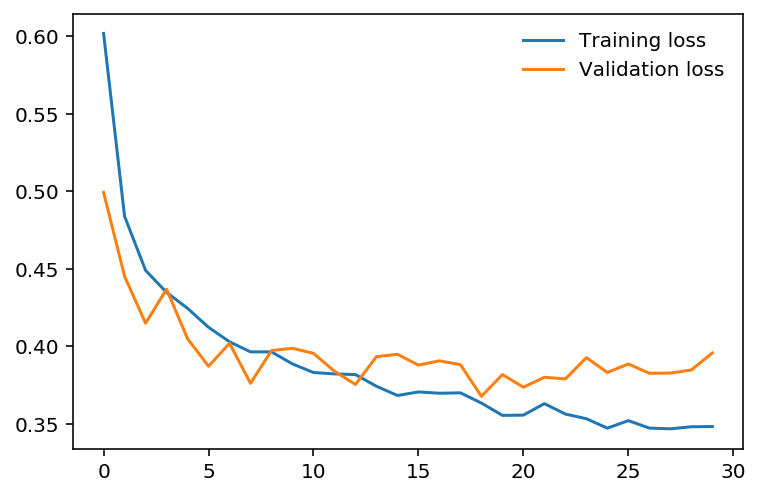

In [18]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

## Inference

* 이제 실제 적용하는 예입니다 (inference)
* 내가 분류작업을 한다고 생각학고 traning이 끝난 네트워크에 적용합니다
* 당연히 model.eval()과 gradient는 비활성화합니다

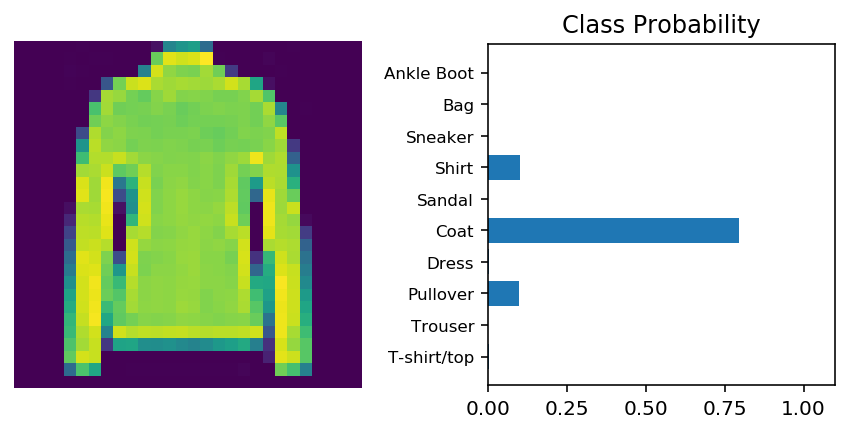

In [19]:
# Import helper module (should be in the repo)
import helper

# Test out your network!

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')